In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [32]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot'
              ]

In [34]:
train_images.shape

(60000, 28, 28)

In [36]:
len(train_labels)

60000

In [38]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [39]:
test_images.shape

(10000, 28, 28)

In [40]:
len(test_labels)

10000

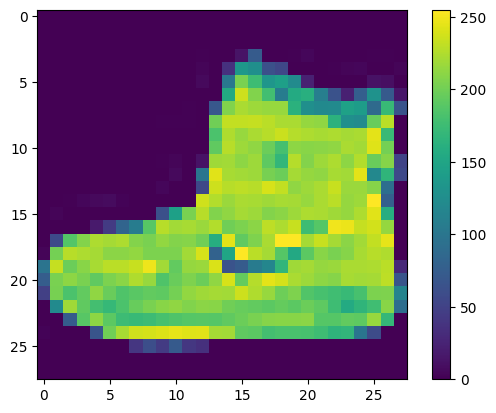

In [41]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [42]:
#归一化
train_images = train_images / 255.0
test_images = test_images / 255.0

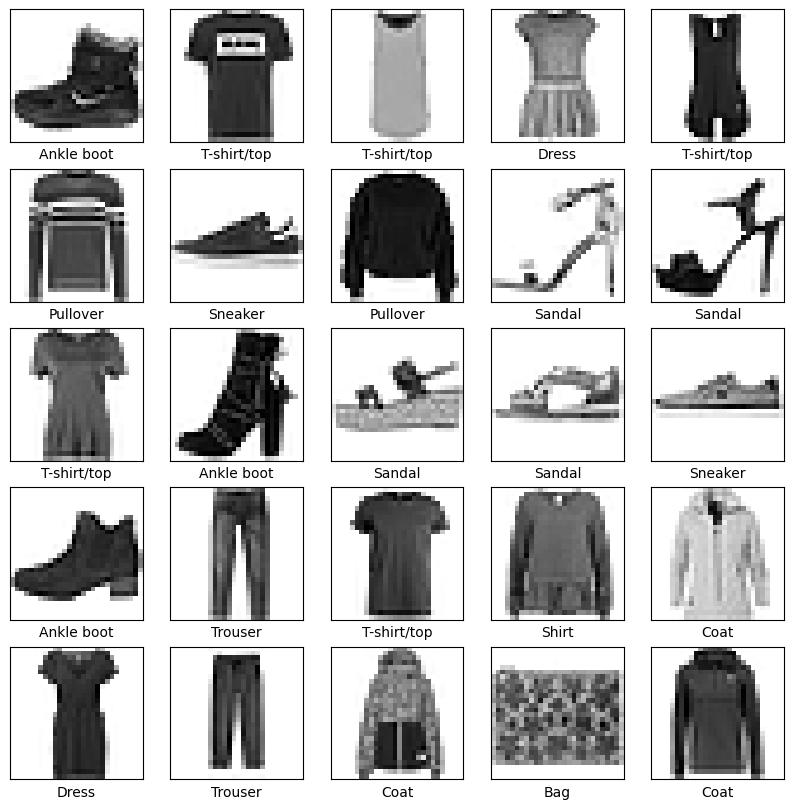

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4797 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3575 - accuracy: 0.8699
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3227 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3011 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.8940
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2685 - accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2548 - accuracy: 0.9034
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2457 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2343 - accuracy: 0.9108
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.225

In [47]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3349 - accuracy: 0.8858 - 872ms/epoch - 3ms/step

Test accuracy: 0.8858000040054321


In [48]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [49]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [50]:
predictions[0]

array([6.4993884e-08, 4.4348081e-07, 5.7362364e-08, 5.9712454e-07,
       4.1180513e-07, 7.5866148e-04, 6.6655581e-08, 4.3532853e-03,
       2.5930236e-10, 9.9488646e-01], dtype=float32)

In [51]:
np.argmax(predictions[0])

9

In [52]:
test_labels[0]

9

In [53]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

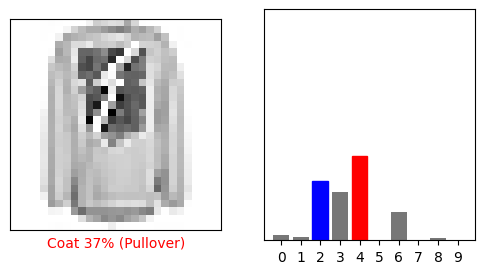

In [57]:
i = 222
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

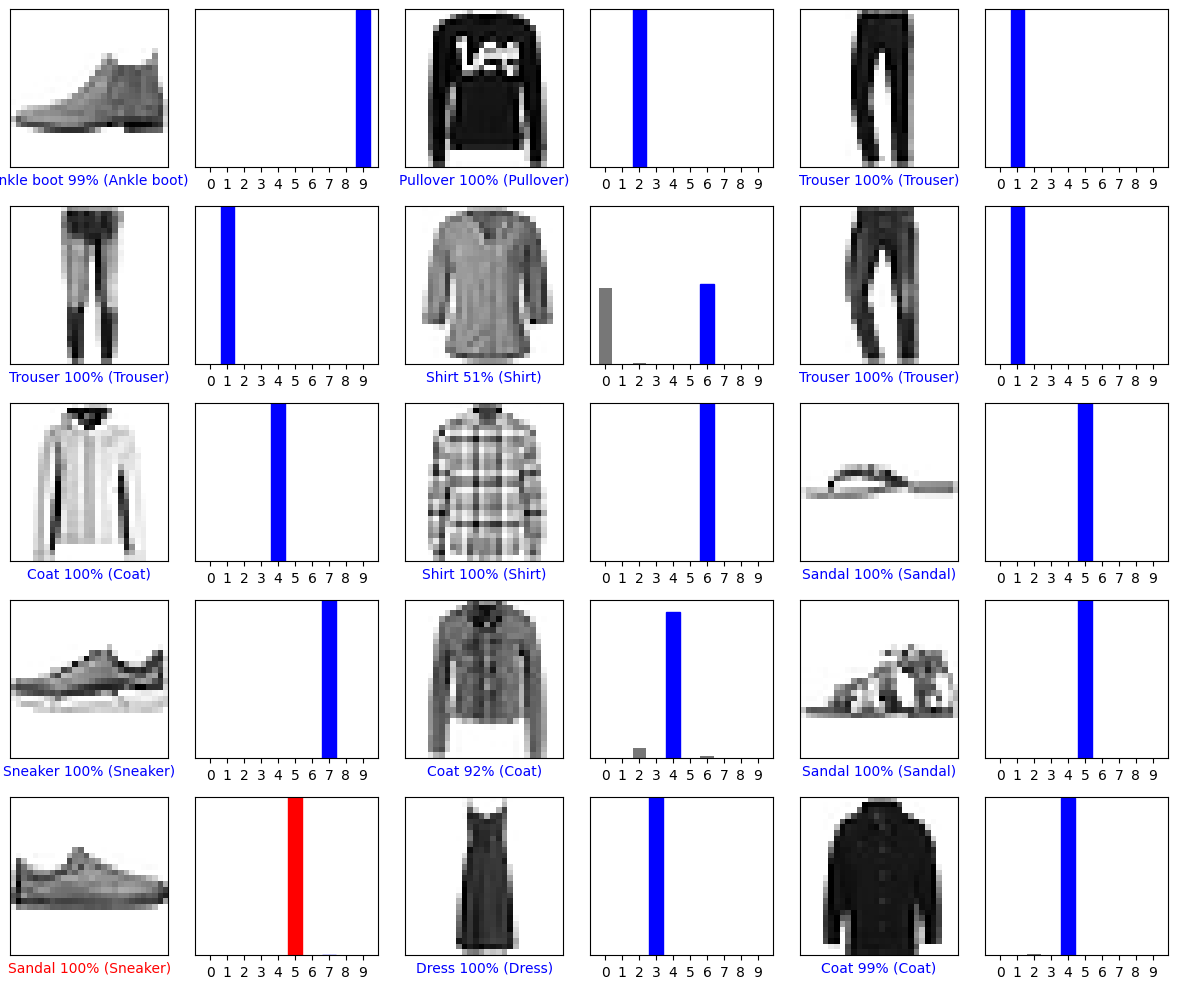

In [58]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [59]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [60]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [61]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 37ms/step
[[9.5423738e-06 9.0065942e-14 9.9863571e-01 2.5765220e-07 1.1701997e-03
  1.4534347e-13 1.8429062e-04 1.7706018e-16 9.1793441e-11 1.9655173e-14]]


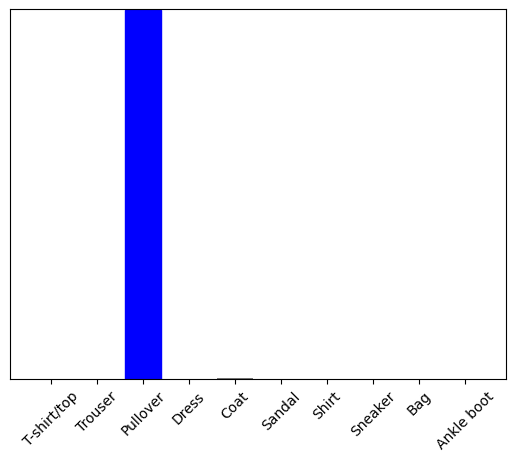

In [62]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)  #旋转45°防止重叠，_为临时占位符
plt.show()

In [63]:
np.argmax(predictions_single[0])

2